In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,5)

In [2]:
data_by_year = {
    2020: {
        "Cheques":                (20_023_553,      15_417_903_424_084.90),
        "ATM":                    (1_914_220_419,   18_199_660_257_528.40),
        "POS":                    (655_748_348,     4_727_076_813_500.42),
        "Internet":               (6_480_548_630,  392_340_246_629_460.00),  # online transactions
        "NEFT":                   (184_886_953,    299_695_123_083_178.00),
        "RTGS":                   (13_460_532,     490_827_301_156_373.00),
        "USSD":                   (482_336_038,     5_033_391_246_816.66),
        "Mobile_App":             (411_452_926,    32_400_853_034_221.70),
        "Direct_Debits":          (2_970_595,       2_434_383_762_154.89),
        "MMOs":                   (769_238_689,    14_987_738_865_830.60),
        "Total":                  (10_145_624_441, 1_245_658_035_983_230.00)
    },

    2021: {
        "Cheques":                (18_257_340,     15_606_837_993_095.60),
        "ATM":                    (1_599_187_337,  21_230_934_547_926.60),
        "POS":                    (2_743_555_841,  24_455_416_207_819.60),
        "Internet":               (10_321_579_925, 545_039_685_403_942.00), # labelled online transfers
        "NEFT":                   (172_792_505,    410_171_471_820_963.00),
        "RTGS":                   (1_042_115,      588_206_008_267_591.00),
        "USSD":                   (552_911_557,     5_179_896_509_758.23),
        "Mobile_App":             (831_540_635,    53_208_272_485_553.60),
        "Direct_Debits":          (103_275_936,    23_011_791_142_706.00),
        "MMOs":                   (1_201_541_158,  15_395_017_340_242.20),
        "Total":                  (16_325_885_851, 1_670_503_476_386_260.00)
    },

    2022: {
        "Cheques":                (16_907_129,     15_250_724_091_469.30),
        "ATM":                    (1_506_991_903,  32_648_023_588_216.20),
        "POS":                    (3_885_782_065,  41_035_801_320_926.60),
        "Internet":               (14_063_927_436, 783_660_029_415_336.00),
        "NEFT":                   (88_468_437,     477_366_944_460_363.00),
        "RTGS":                   (288_216,        73_706_479_398_538.40),
        "USSD":                   (516_080_595,     4_494_448_168_094.12),
        "Mobile_App":             (1_861_362_984, 111_122_110_680_403.00),
        "Direct_Debits":          (151_011_103,    26_409_371_273_656.00),
        "MMOs":                   (1_926_293_135,  32_599_014_785_038.20),
        "Total":                  (22_073_912_739, 1_550_443_208_305_530.00)
    },

    2023: {
        "Cheques":                (16_054_396,     15_522_398_801_893.90),
        "ATM":                    (1_012_277_981,  28_212_594_626_317.60),
        "POS":                    (9_847_258_500, 110_347_102_925_486.00),
        "Internet":               (21_753_925_242,1_097_133_039_705_830.00),
        "NEFT":                   (93_112_941,     646_336_529_663_539.00),
        "RTGS":                   (304_178,       112_701_551_998_007.00),
        "USSD":                   (630_600_359,     4_840_430_297_077.70),
        "Mobile_App":             (5_259_477_576, 219_800_083_901_667.00),
        "Direct_Debits":          (133_580_757,    21_423_121_326_181.10),
        "MMOs":                   (10_774_795_048, 97_163_887_025_386.80),
        "Total":                  (38_730_537_534, 2_240_794_454_444_110.00)
    },

    # 2024 in your paste is Jan-Jun (half-year). We'll include it labeled 2024_H1
    2024: {
        "Cheques":                (6_877_644,        8_741_212_873_693.00),
        "ATM":                    (496_436_959,     12_206_733_099_741.90),
        "POS":                    (6_395_670_571,   85_914_704_798_833.20),
        "Internet":               (11_638_142_074, 825_500_108_736_661.00),
        "NEFT":                   (44_828_568,     366_070_778_840_562.00),
        "RTGS":                   (182_583,         95_087_892_176_084.50),
        "USSD":                   (252_059_346,      2_188_099_220_103.11),
        "Mobile_App":             (3_493_116_888,  159_419_658_081_137.00),
        "Direct_Debits":          (99_273_566,      12_517_759_222_441.50),
        "MMOs":                   (7_181_494_209,   78_203_693_683_958.50),
        "Total":                  (22_419_710_555,1_558_905_734_175_560.00)
    }
}

In [3]:
# 2) Build tidy DataFrame: columns -> Year, Channel, Volume, Value, Period
# -----------------------------
rows = []
for year, channels in data_by_year.items():
    period = "2024_H1" if year == 2024 else str(year)
    for ch, (vol, val) in channels.items():
        rows.append({
            "Year": year,
            "Period": period,
            "Channel": ch,
            "Volume": np.nan if vol is None else vol,
            "Value": np.nan if val is None else val
        })

df_channels = pd.DataFrame(rows)

# Sort for readability
df_channels = df_channels.sort_values(["Year", "Channel"]).reset_index(drop=True)


In [4]:
# 3) Convert numeric columns (ensure numbers are numeric)
# -----------------------------
df_channels["Volume"] = pd.to_numeric(df_channels["Volume"], errors="coerce")
df_channels["Value"] = pd.to_numeric(df_channels["Value"], errors="coerce")

# Quick preview
print("Shape:", df_channels.shape)
display(df_channels.head(20))

Shape: (55, 5)


,Year,Period,Channel,Volume,Value
0,2020,2020,ATM,1914220419,1.819966e+13
1,2020,2020,Cheques,20023553,1.541790e+13
2,2020,2020,Direct_Debits,2970595,2.434384e+12
3,2020,2020,Internet,6480548630,3.923402e+14
4,2020,2020,MMOs,769238689,1.498774e+13
5,2020,2020,Mobile_App,411452926,3.240085e+13
6,2020,2020,NEFT,184886953,2.996951e+14
7,2020,2020,POS,655748348,4.727077e+12
8,2020,2020,RTGS,13460532,4.908273e+14
9,2020,2020,Total,10145624441,1.245658e+15


In [5]:
# 4) Pivot tables for analysis: Volume and Value by Channel x Year
# -----------------------------
vol_pivot = df_channels.pivot(index="Channel", columns="Year", values="Volume")
val_pivot = df_channels.pivot(index="Channel", columns="Year", values="Value")

print("\nVolume pivot (channels x years):")
display(vol_pivot)

print("\nValue pivot (channels x years):")
display(val_pivot)


Volume pivot (channels x years):


Year,2020,2021,2022,2023,2024
Channel,,,,,
ATM,1914220419,1599187337,1506991903,1012277981,496436959
Cheques,20023553,18257340,16907129,16054396,6877644
Direct_Debits,2970595,103275936,151011103,133580757,99273566
Internet,6480548630,10321579925,14063927436,21753925242,11638142074
MMOs,769238689,1201541158,1926293135,10774795048,7181494209
Mobile_App,411452926,831540635,1861362984,5259477576,3493116888
NEFT,184886953,172792505,88468437,93112941,44828568
POS,655748348,2743555841,3885782065,9847258500,6395670571
RTGS,13460532,1042115,288216,304178,182583



Value pivot (channels x years):


Year,2020,2021,2022,2023,2024
Channel,,,,,
ATM,1.819966e+13,2.123093e+13,3.264802e+13,2.821259e+13,1.220673e+13
Cheques,1.541790e+13,1.560684e+13,1.525072e+13,1.552240e+13,8.741213e+12
Direct_Debits,2.434384e+12,2.301179e+13,2.640937e+13,2.142312e+13,1.251776e+13
Internet,3.923402e+14,5.450397e+14,7.836600e+14,1.097133e+15,8.255001e+14
MMOs,1.498774e+13,1.539502e+13,3.259901e+13,9.716389e+13,7.820369e+13
Mobile_App,3.240085e+13,5.320827e+13,1.111221e+14,2.198001e+14,1.594197e+14
NEFT,2.996951e+14,4.101715e+14,4.773669e+14,6.463365e+14,3.660708e+14
POS,4.727077e+12,2.445542e+13,4.103580e+13,1.103471e+14,8.591470e+13
RTGS,4.908273e+14,5.882060e+14,7.370648e+13,1.127016e+14,9.508789e+13


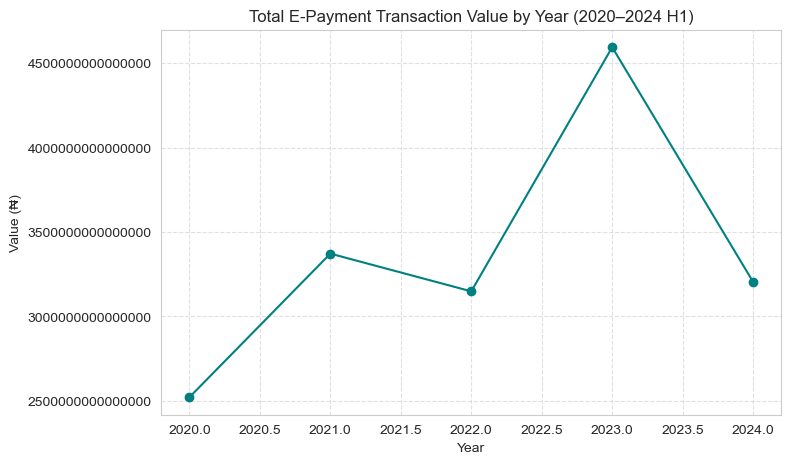

In [7]:
# 5) Example plots: Total value over time & channel share in 2023
# ---------------------------------------------------------------

import matplotlib.pyplot as plt

# Keep only standardized years (2020–2024)
df_clean = df_channels[df_channels["Year"].between(2020, 2024)]

# Compute total transaction value per year
totals = (
    df_clean.groupby("Year")["Value"]
    .sum(min_count=1)
    .reindex(sorted(df_clean["Year"].unique()))
)

# Plot total e-payment values over time
plt.figure(figsize=(8,5))
plt.plot(totals.index, totals.values, marker='o', color='teal')
plt.title("Total E-Payment Transaction Value by Year (2020–2024 H1)", fontsize=12)
plt.ylabel("Value (₦)", fontsize=10)
plt.xlabel("Year", fontsize=10)
plt.ticklabel_format(axis='y', style='plain')  # avoid scientific notation
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [9]:
# 6) Growth metrics: YoY percent change for main channels (Value)
# ---------------------------------------------------------------

# Keep only 2020–2024 columns (ignore 2019)
val_pivot_sorted = val_pivot.reindex(columns=sorted([c for c in val_pivot.columns if c >= 2020]))

# Compute Year-on-Year % change
val_pctchg = val_pivot_sorted.pct_change(axis=1) * 100

print("\nYear-on-Year % Change in Transaction Value by Channel (2020–2024):")
display(val_pctchg.round(2))



Year-on-Year % Change in Transaction Value by Channel (2020–2024):


Year,2020,2021,2022,2023,2024
Channel,,,,,
ATM,NaN,16.66,53.78,-13.59,-56.73
Cheques,NaN,1.23,-2.28,1.78,-43.69
Direct_Debits,NaN,845.28,14.76,-18.88,-41.57
Internet,NaN,38.92,43.78,40.00,-24.76
MMOs,NaN,2.72,111.75,198.06,-19.51
Mobile_App,NaN,64.22,108.84,97.80,-27.47
NEFT,NaN,36.86,16.38,35.40,-43.36
POS,NaN,417.35,67.80,168.90,-22.14
RTGS,NaN,19.84,-87.47,52.91,-15.63


In [10]:
# 7) Save cleaned dataset
# -----------------------------
df_channels.to_csv("e_payment_channel_level_2020_2024.csv", index=False)
vol_pivot.to_csv("e_payment_volume_pivot_2020_2024.csv")
val_pivot.to_csv("e_payment_value_pivot_2020_2024.csv")

print("\nFiles saved:")
print("e_payment_channel_level_2020_2024.csv")
print("e_payment_volume_pivot_2020_2024.csv")
print("e_payment_value_pivot_2020_2024.csv")


Files saved:
e_payment_channel_level_2020_2024.csv
e_payment_volume_pivot_2020_2024.csv
e_payment_value_pivot_2020_2024.csv


In [11]:
# 7) Normalize values for readability (₦ trillions)
# -------------------------------------------------
val_trillions = val_pivot.copy() / 1_000_000_000_000  # convert to trillions
val_trillions = val_trillions.reindex(columns=sorted([c for c in val_trillions.columns if c >= 2020]))

print("E-Payment Transaction Values (₦ Trillions):")
display(val_trillions.round(2))


E-Payment Transaction Values (₦ Trillions):


Year,2020,2021,2022,2023,2024
Channel,,,,,
ATM,18.20,21.23,32.65,28.21,12.21
Cheques,15.42,15.61,15.25,15.52,8.74
Direct_Debits,2.43,23.01,26.41,21.42,12.52
Internet,392.34,545.04,783.66,1097.13,825.50
MMOs,14.99,15.40,32.60,97.16,78.20
Mobile_App,32.40,53.21,111.12,219.80,159.42
NEFT,299.70,410.17,477.37,646.34,366.07
POS,4.73,24.46,41.04,110.35,85.91
RTGS,490.83,588.21,73.71,112.70,95.09


In [12]:
# 8) Compute CAGR (2020–2024)
# -------------------------------------------------
import numpy as np

years = val_trillions.columns
n_years = len(years) - 1  # 4 years between 2020–2024

cagr = ((val_trillions[2024] / val_trillions[2020]) ** (1 / n_years) - 1) * 100
cagr = cagr.sort_values(ascending=False)

print("Compound Annual Growth Rate (CAGR) by Channel (2020–2024):")
display(cagr.round(2))


Compound Annual Growth Rate (CAGR) by Channel (2020–2024):


Channel
POS              106.48
MMOs              51.14
Direct_Debits     50.59
Mobile_App        48.93
Internet          20.44
Total              5.77
NEFT               5.13
ATM               -9.50
Cheques          -13.23
USSD             -18.80
RTGS             -33.66
dtype: float64

<Figure size 1000x600 with 0 Axes>

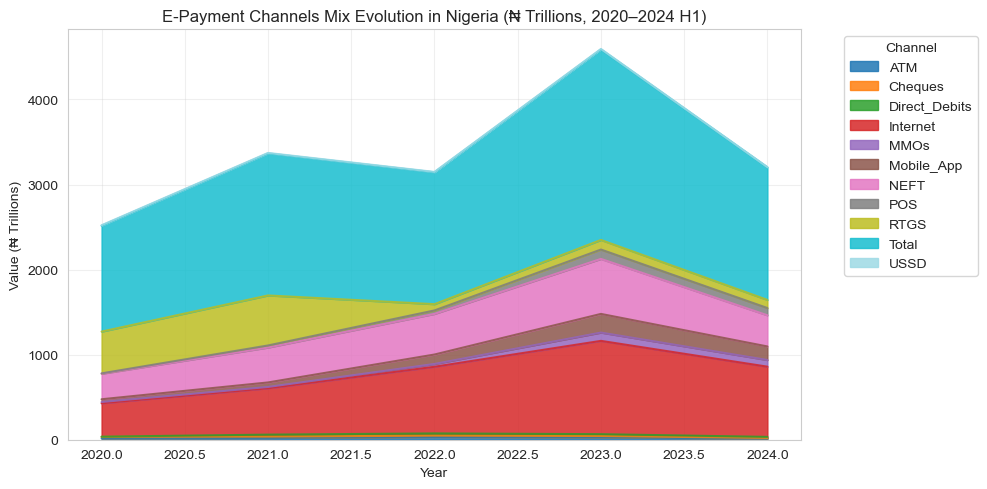

In [13]:
# 9) Stacked area chart: Channel mix evolution (2020–2024)
# -------------------------------------------------
plt.figure(figsize=(10,6))
val_trillions.T.plot.area(colormap="tab20", alpha=0.85)
plt.title("E-Payment Channels Mix Evolution in Nigeria (₦ Trillions, 2020–2024 H1)", fontsize=12)
plt.ylabel("Value (₦ Trillions)", fontsize=10)
plt.xlabel("Year", fontsize=10)
plt.legend(title="Channel", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


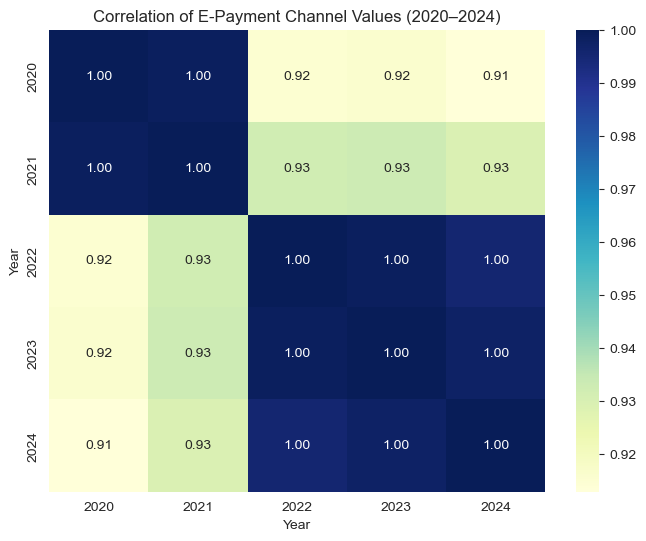

In [14]:
# 10) Correlation heatmap between channels (Value trends 2020–2024)
# ------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

corr = val_trillions.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Correlation of E-Payment Channel Values (2020–2024)", fontsize=12)
plt.show()


Strong positive correlations (close to 1.0) indicate that channels such as Internet, POS, Mobile App, 
and USSD tend to grow together — a signal of digital payment ecosystem expansion

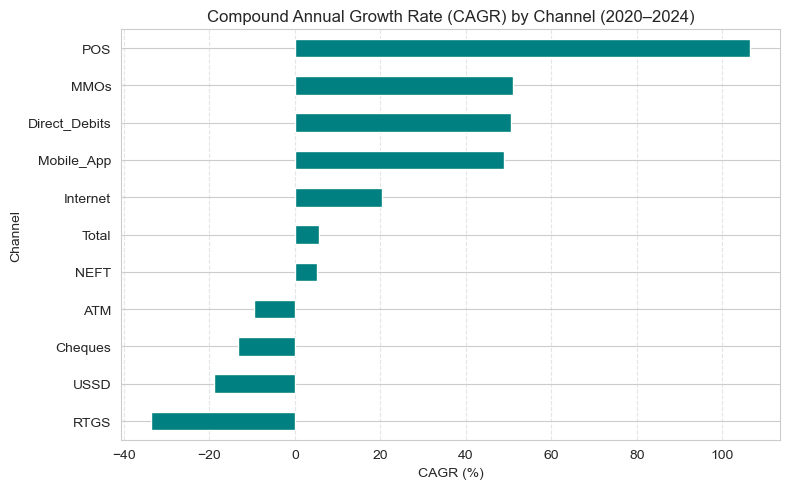

In [15]:
# 11) CAGR bar chart for each channel (2020–2024)
# ------------------------------------------------------------------
plt.figure(figsize=(8,5))
cagr.sort_values(ascending=True).plot(kind='barh', color='teal')
plt.title("Compound Annual Growth Rate (CAGR) by Channel (2020–2024)", fontsize=12)
plt.xlabel("CAGR (%)", fontsize=10)
plt.ylabel("Channel", fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Channels at the top show the fastest growth (e.g., Mobile App or USSD), indicating shifting consumer preference toward 
instant and app-based transactions.

Share of Total E-Payment Transaction Value by Channel – 2024 H1


Channel
Total            48.64
Internet         25.76
NEFT             11.42
Mobile_App        4.97
RTGS              2.97
POS               2.68
MMOs              2.44
Direct_Debits     0.39
ATM               0.38
Cheques           0.27
USSD              0.07
Name: 2024, dtype: float64

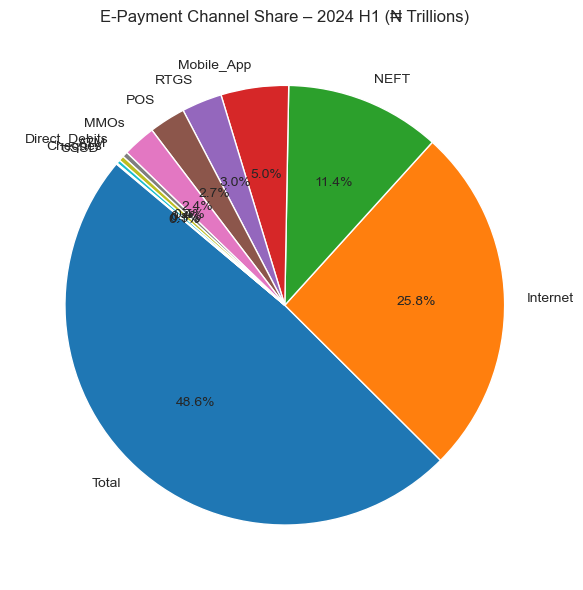

In [16]:
# 12) Compute 2024 share of total e-payment value
# ------------------------------------------------------------------
share_2024 = (val_trillions[2024] / val_trillions[2024].sum()) * 100
share_2024 = share_2024.sort_values(ascending=False)

print("Share of Total E-Payment Transaction Value by Channel – 2024 H1")
display(share_2024.round(2))

# Optional pie chart
plt.figure(figsize=(6,6))
plt.pie(share_2024, labels=share_2024.index, autopct='%1.1f%%', startangle=140)
plt.title("E-Payment Channel Share – 2024 H1 (₦ Trillions)", fontsize=12)
plt.tight_layout()
plt.show()


This quantifies each channel’s contribution to Nigeria’s 2024 digital payment ecosystem. Expect Internet Transfers, 
Mobile App, and POS to dominate, while Cheques and RTGS shrink further.